# Importing Required Libraries

In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
df = pd.read_csv('utrechthousinghuge.csv') 

In [69]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11.1,5.0,55.5,112.50,10.5,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,13.6,5.0,68.0,112.50,8.0,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,16.6,6.7,111.2,150.75,44.2,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,18.6,6.0,111.6,108.00,39.6,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,19.6,6.0,117.6,108.00,45.6,1,2962,5266,1950,1,526000,610000,0,1


# Bar plot for categorical features (energy efficiency)

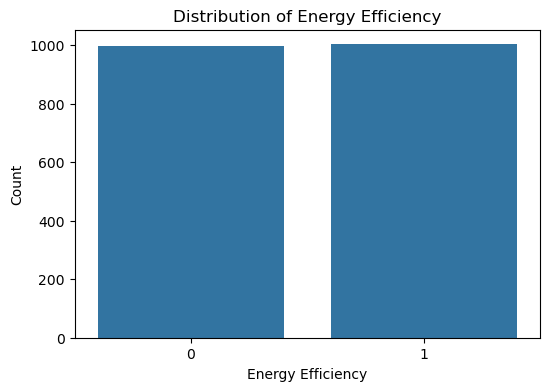

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(x='energy-eff', data=df)
plt.title("Distribution of Energy Efficiency")
plt.xlabel("Energy Efficiency")
plt.ylabel("Count")
plt.show()

# Histograms for numerical features

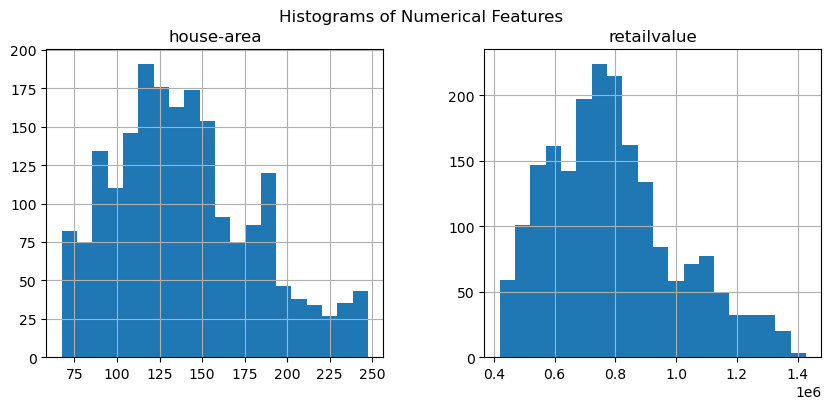

In [71]:
numerical_features = ['house-area', 'retailvalue']
df[numerical_features].hist(bins=20, figsize=(10,4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Correlation heatmap

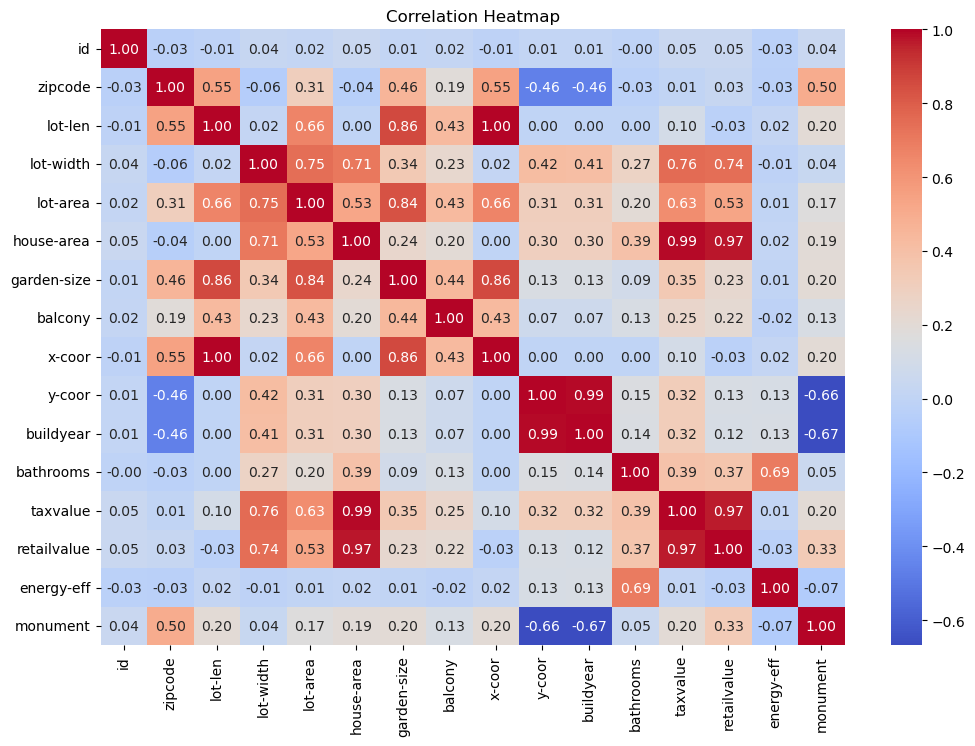

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to identify outliers

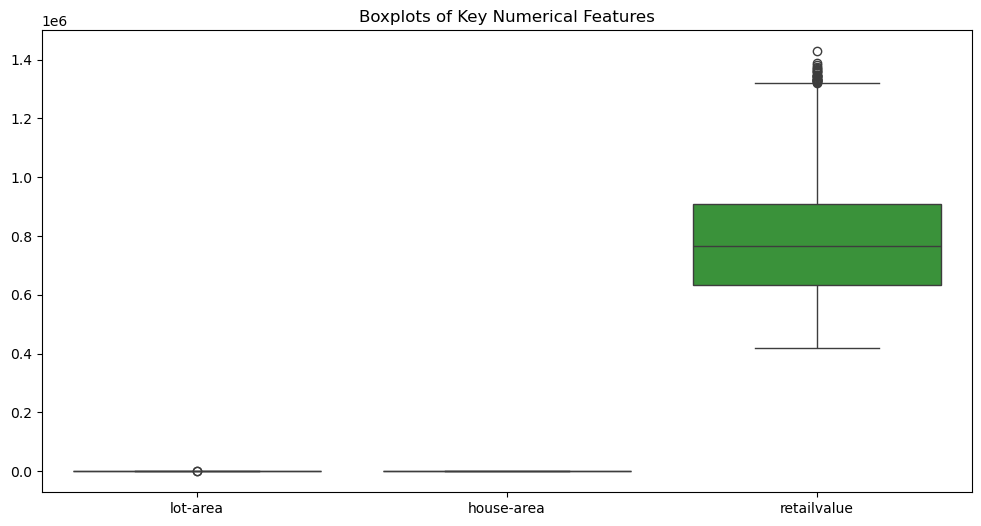

In [73]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['lot-area', 'house-area', 'retailvalue']])
plt.title("Boxplots of Key Numerical Features")
plt.show()

# Scatter plots for key features vs house prices

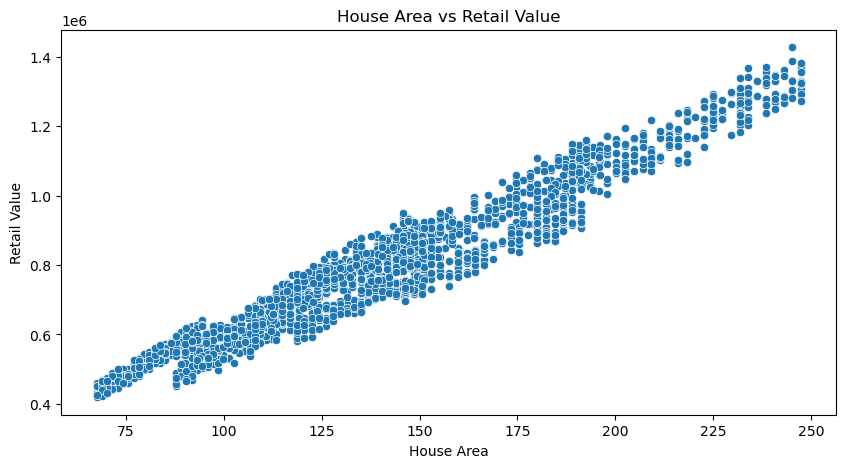

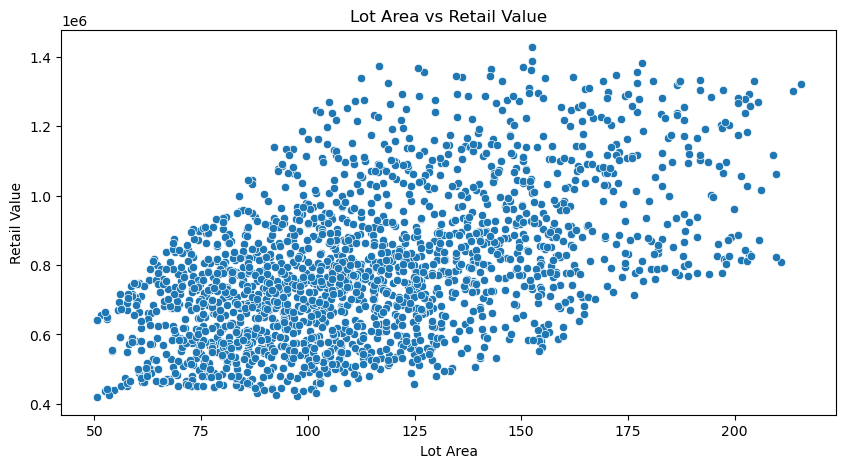

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='house-area', y='retailvalue', data=df)
plt.title("House Area vs Retail Value")
plt.xlabel("House Area")
plt.ylabel("Retail Value")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x='lot-area', y='retailvalue', data=df)
plt.title("Lot Area vs Retail Value")
plt.xlabel("Lot Area")
plt.ylabel("Retail Value")
plt.show()

# Model Implementation and Evaluation

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop(columns=["id", "retailvalue"])
y = df["retailvalue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression

In [77]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("MSE:", mean_squared_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2:", r2_score(y_test, lr_pred))


Linear Regression
MAE: 17064.65329466523
MSE: 422182677.98058885
RMSE: 20547.084415570713
R2: 0.9908394763707136


# Decision Tree Regressor 

In [78]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10
)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("MSE:", mean_squared_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R2:", r2_score(y_test, dt_pred))


Decision Tree Regressor
MAE: 17581.977360317822
MSE: 544578813.1422111
RMSE: 23336.212484938747
R2: 0.988183723904401


# Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=15
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))


Random Forest Regressor
MAE: 10060.363967570038
MSE: 167868268.36368638
RMSE: 12956.398742076688
R2: 0.9963575927692996


# Results Comparison Table

In [80]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, dt_pred),
        mean_absolute_error(y_test, rf_pred)
    ],
    "MSE": [
        mean_squared_error(y_test, lr_pred),
        mean_squared_error(y_test, dt_pred),
        mean_squared_error(y_test, rf_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, dt_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred))
    ],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, rf_pred)
    ]
})

results


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,17064.653295,4.221827e+08,20547.084416,0.990839
1,Decision Tree,17581.977360,5.445788e+08,23336.212485,0.988184
2,Random Forest,10060.363968,1.678683e+08,12956.398742,0.996358


# Accuracy (R²) Comparison Bar Plot

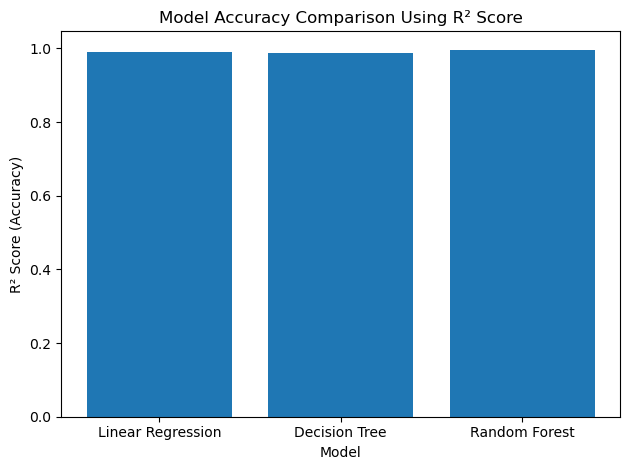

In [81]:
r2_lr = r2_score(y_test, lr_pred)
r2_dt = r2_score(y_test, dt_pred)
r2_rf = r2_score(y_test, rf_pred)

models = ["Linear Regression", "Decision Tree", "Random Forest"]
scores = [r2_lr, r2_dt, r2_rf]

plt.figure()
plt.bar(models, scores)
plt.xlabel("Model")
plt.ylabel("R² Score (Accuracy)")
plt.title("Model Accuracy Comparison Using R² Score")
plt.tight_layout()
plt.show()

# RMSE comparison bar plot

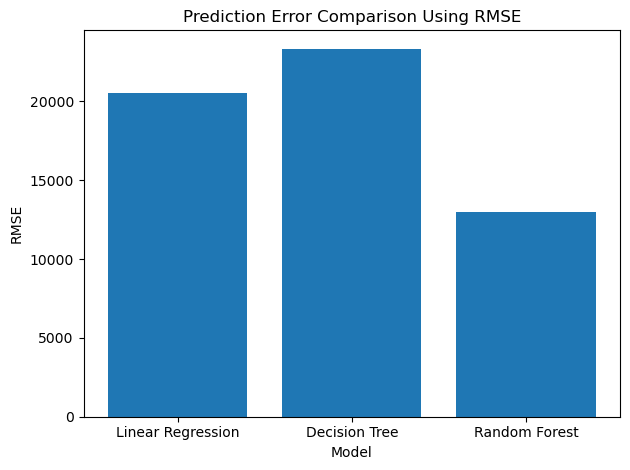

In [82]:
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

models = ["Linear Regression", "Decision Tree", "Random Forest"]
rmse_scores = [rmse_lr, rmse_dt, rmse_rf]

plt.figure()
plt.bar(models, rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Prediction Error Comparison Using RMSE")
plt.tight_layout()
plt.show()